# Ensemble feature viz first (for c1 and c2)

In [1]:
import molli as ml
import molli.visual
import molli.visual.backend_pyvista
import pyvista
import numpy as np
import matplotlib.pyplot as plt

### For c2 regularized models

In [2]:
selected = np.load("real_output/optimized_with_outlier/all_features.npy")
selected_IDW_1 = np.load("real_output/optimized_with_outlier/all_features_IDW_1.npy")
selected_IDW_2 = np.load("real_output/optimized_with_outlier/all_features_IDW_2.npy")
selected_IDW_3 = np.load("real_output/optimized_with_outlier/all_features_IDW_3.npy")

In [3]:
grid = np.load("grid.npy")

In [4]:
ids = selected[:, 0].astype(int)
freq = selected[:, 1].astype(np.float64)
filtered = grid[ids]
print(len(filtered))

537


In [14]:
more_than_twice = np.array([i for i in selected if i[1].astype(np.float64) > 2])
print(len(more_than_twice))

56


In [15]:
more_ids = more_than_twice[:, 0].astype(int)
more_freqs = more_than_twice[:, 1].astype(int)

<BarContainer object of 56 artists>

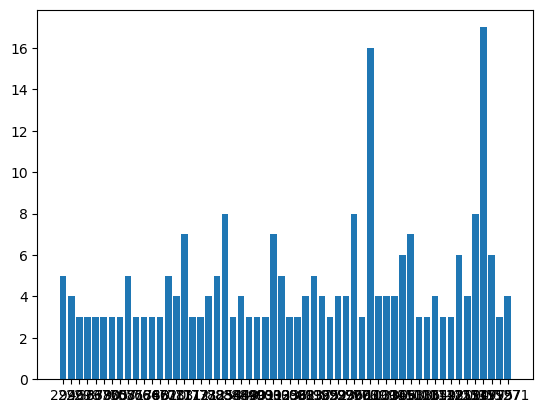

In [16]:
plt.bar(more_ids.astype(str), more_freqs)

Think about applying statistical analysis. I.e find out threshold of selection for features to be statistically significant

In [17]:
filtered_more = grid[more_ids]

In [19]:
cloud = pyvista.PolyData(filtered_more)
cloud.point_data["values"] = more_freqs

In [20]:
plotter = pyvista.Plotter()

/home/ethangm2/miniconda3/envs/DFT/lib/python3.11/site-packages/pyvista/plotting/plotting.py:148: UserWarning: 
This system does not appear to be running an xserver.
PyVista will likely segfault when rendering.

Try starting a virtual frame buffer with xvfb, or using
  ``pyvista.start_xvfb()``

  warnings.warn(


In [ ]:
# Mess with coloration here (coolwarm -> [red, green])
plotter.add_points(cloud, render_points_as_spheres=True, cmap=['red', 'green'], clim=[min(more_freqs), max(more_freqs)])
plotter.show()

In [21]:
SI_lib = ml.ConformerLibrary("../nbo-cu-box-clean/caseys/conformers_no_linker.mlib")
SI_lib["aa_1"][0] # aa_1 is just my go to

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Conformer(name='aa_1', formula='C21 H18 N2 O2')

In [22]:
ml.visual.backend_pyvista.plot_structure_as_wireframe(plotter, SI_lib["aa_1"][0])

In [ ]:
plotter.show()

In [ ]:
plotter.save_graphic("c2.svg")

### Now for same models but w/ c1

In [3]:
c1_selected = np.load("../aso-modeling-out/halved-ridge-lasso-en-og-outliers/all_features_skip.npy")
c1_selected_IDW_1 = np.load("../aso-modeling-out/halved-ridge-lasso-en-og-outliers/all_features_IDW_1_skip.npy")
c1_selected_IDW_2 = np.load("../aso-modeling-out/halved-ridge-lasso-en-og-outliers/all_features_IDW_2_skip.npy")
c1_selected_IDW_3 = np.load("../aso-modeling-out/halved-ridge-lasso-en-og-outliers/all_features_IDW_3_skip.npy")

In [4]:
c1_grid = np.load("../grid_testing/casey_redo_all_halved.npy")
c1_grid.shape

(14976, 3)

In [5]:
c1_ids = c1_selected[:, 0].astype(int)
c1_freq = c1_selected[:, 1].astype(np.float64)
c1_filtered = c1_grid[c1_ids]
print(len(c1_filtered))

734


In [6]:
c1_thrice = np.array([i for i in c1_selected if i[1].astype(np.float64) > 2])
print(len(c1_thrice))

136


In [7]:
c1_more_ids = c1_thrice[:, 0].astype(int)
c1_more_freqs = c1_thrice[:, 1].astype(int)

In [9]:
print(c1_more_freqs)

[ 3  4  3  3  3  4  3  5  3  3  4  4  4  3  3  3  3  5  4  4  5  3  8  3
  3 12 10  5  3  6  8  3  3  5  9  3  4 12  4  8  9  5  4  6  3  7  3  3
  3  4  3  8  4  3  4  9  3  4  5  9  3  7  6  6  3  3  3  3  4  8  5  8
  5  4  3  3 10  4  3  5  3 10  3  3  4  6  8  3  7  3  7 10  3  7  6 11
  4  3  3  4  8 12  4  6  3  3 11  3  5  8  4  8  3  4  3  8  3  3  4  3
  3  6  5  3  3  6  3  3  4  3  3 18  8  6  4  4]


! C1 run has additional "blank" outlier run compared to C2 run, but LOF is equivalent to blank, so extra unneccesary runs !

^ I fixed it with the "_skip" arrays

<BarContainer object of 136 artists>

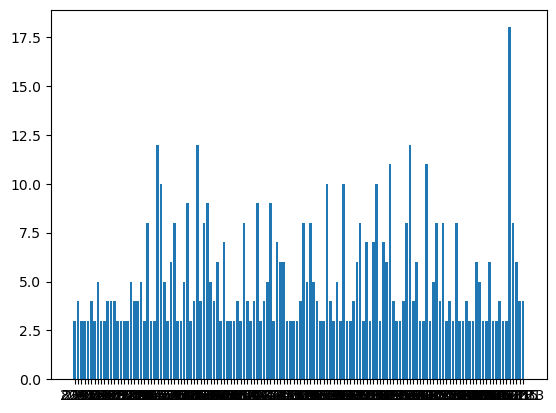

In [10]:
plt.bar(c1_more_ids.astype(str), c1_more_freqs)

In [11]:
c1_filtered_more = c1_grid[c1_more_ids]

In [12]:
cloud = pyvista.PolyData(c1_filtered_more)
cloud.point_data["values"] = c1_more_freqs

In [46]:
plotter = pyvista.Plotter()

/home/ethangm2/miniconda3/envs/DFT/lib/python3.11/site-packages/pyvista/plotting/plotting.py:148: UserWarning: 
This system does not appear to be running an xserver.
PyVista will likely segfault when rendering.

Try starting a virtual frame buffer with xvfb, or using
  ``pyvista.start_xvfb()``

  warnings.warn(


In [47]:
# Mess with coloration here
plotter.add_points(cloud, render_points_as_spheres=True, cmap='coolwarm', clim=[min(c1_more_freqs), max(c1_more_freqs)])
plotter.show()


--------------------------------------------------------------------------------
   !!! You are currently using trame@3 which may break your application !!!
--------------------------------------------------------------------------------

 1. trame@3 only provides by default trame.widgets.[html,client] and remove
    everything else as implicit dependency. Those other widgets will still
    exist and will be supported, but they will need to be defined as a
    dependency of your application.

       $ pip install trame-vtk trame-vuetify trame-plotly

    Import paths are remaining the same.

    For libraries like vuetify since they offer different API between
    their vue2 and vue3 implementation, the widget name will reflect
    which vue version they are referencing. But original naming will remain.

       from trame.widgets import vuetify2, vuetify3


 2. trame@3 aims to use vue3 as a new default. But to smooth the transition
    we will maintain the server.client_type = 'vue2' 

: 

In [2]:
ml.visual.backend_pyvista.plot_structure_as_wireframe(plotter, SI_lib["aa_1"][0])

NameError: name 'plotter' is not defined

In [ ]:
plotter.show()

In [ ]:
plotter.save_graphic("c1.svg")

## Random matplotlib stuff

In [9]:
x = np.random.default_rng(1).uniform(size=20)
y = x + np.random.default_rng(1).normal(scale=0.1, size=20)

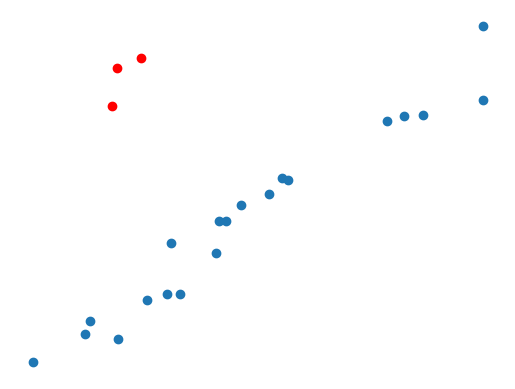

In [16]:
fig = plt.figure()
scat = plt.scatter(x, y)
plt.scatter([0.2, 0.25, 0.19], [0.91, 0.94, 0.8], c='red')
plt.axis("off")
plt.show()
fig.savefig("../images/outlier_detect.png")
plt.close()

In [33]:
a, b = np.polyfit(x, y, 1)
a

0.9731142204091661

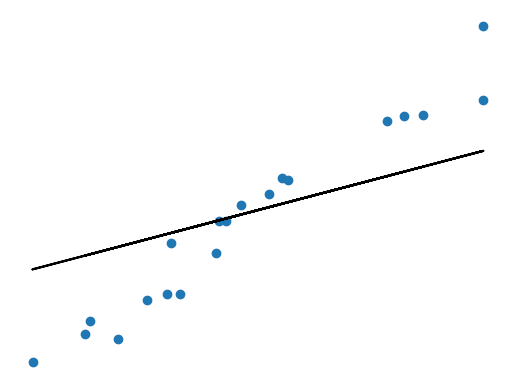

In [42]:
fig = plt.figure()
scat = plt.scatter(x, y)
plt.plot(x, b + 0.3 + (a - 0.6) * x, color="k")
#plt.scatter([0.2, 0.25, 0.19], [0.91, 0.94, 0.8], c='red')
plt.axis("off")
plt.show()
fig.savefig("../images/lin_reg.png")
plt.close()

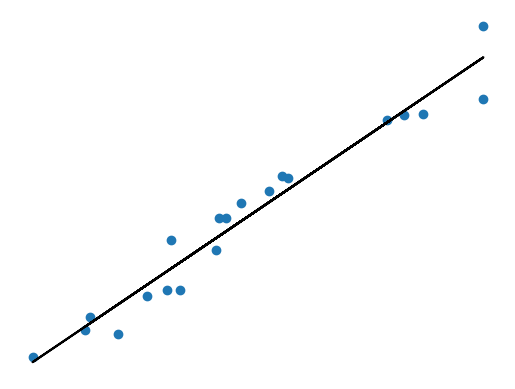

In [43]:
fig = plt.figure()
scat = plt.scatter(x, y)
plt.plot(x, b + a * x, color="k")
#plt.scatter([0.2, 0.25, 0.19], [0.91, 0.94, 0.8], c='red')
plt.axis("off")
plt.show()
fig.savefig("../images/lin_reg_correct.png")
plt.close()